## Abstract
Ransomware attacks are on the rise and attackers are hijacking valuable information from different critical infrastructures and businesses requiring ransom payments to release the encrypted files.

Payments in cryptocurrencies are designed to evade tracing the transactions and the recipients. With anonymity being paramount, tracing cryptocurrencies payments due to malicious activity and criminal transactions is a complicated process.

Therefore, the need to identify these transactions and label them is crucial to categorize them as legitimate digital currency trade and exchange or malicious activity operations.

Machine learning techniques are utilized to train the machine to recognize specific transactions and trace them back to malicious transactions or benign ones.

I propose to work on the Bitcoin Heist data set to classify the different malicious transactions. The different transactions features are analyzed to predict a classifier label among the classifiers that have been identified as ransomware or associated with malicious activity.

I limit the study design to known ransomware identified previously and made available under the Bitcoin transaction graph from January 2009 to December 2018.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#Charging the dataset
df = pd.read_csv("/BitcoinHeistData.csv")
df

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,1.000500e+08,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,1.000000e+08,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,2.000000e+08,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,7.120000e+07,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,2.000000e+08,princetonLocky
...,...,...,...,...,...,...,...,...,...,...
2916692,12D3trgho1vJ4mGtWBRPyHdMJK96TRYSry,2018,330,0,0.111111,1,0,1,1.255809e+09,white
2916693,1P7PputTcVkhXBmXBvSD9MJ3UYPsiou1u2,2018,330,0,1.000000,1,0,1,4.409699e+07,white
2916694,1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw,2018,330,2,12.000000,6,6,35,2.398267e+09,white
2916695,15iPUJsRNZQZHmZZVwmQ63srsmughCXV4a,2018,330,0,0.500000,1,0,1,1.780427e+08,white


In [ ]:
#Dataset columns
df.columns

Index(['address', 'year', 'day', 'length', 'weight', 'count', 'looped',
       'neighbors', 'income', 'label'],
      dtype='object')

In [ ]:
#Dimensions of the dataset
df.shape

(2916697, 10)

In [ ]:
#Target column
df.label

0          princetonCerber
1           princetonLocky
2          princetonCerber
3          princetonCerber
4           princetonLocky
                ...       
2916692              white
2916693              white
2916694              white
2916695              white
2916696              white
Name: label, Length: 2916697, dtype: object

In [ ]:
#All our target values
df["label"].unique()

array(['princetonCerber', 'princetonLocky', 'montrealCryptoLocker',
       'montrealCryptXXX', 'paduaCryptoWall', 'montrealWannaCry',
       'montrealDMALockerv3', 'montrealCryptoTorLocker2015',
       'montrealSamSam', 'montrealFlyper', 'montrealNoobCrypt',
       'montrealDMALocker', 'montrealGlobe', 'montrealEDA2',
       'paduaKeRanger', 'montrealVenusLocker', 'montrealXTPLocker',
       'paduaJigsaw', 'montrealGlobev3', 'montrealJigSaw',
       'montrealXLockerv5.0', 'montrealXLocker', 'montrealRazy',
       'montrealCryptConsole', 'montrealGlobeImposter', 'montrealSam',
       'montrealComradeCircle', 'montrealAPT', 'white'], dtype=object)

In [ ]:
# Calculating the amount of each unique label in the 'label' column
df["label"].value_counts()

white                          2875284
paduaCryptoWall                  12390
montrealCryptoLocker              9315
princetonCerber                   9223
princetonLocky                    6625
montrealCryptXXX                  2419
montrealNoobCrypt                  483
montrealDMALockerv3                354
montrealDMALocker                  251
montrealSamSam                      62
montrealCryptoTorLocker2015         55
montrealGlobeImposter               55
montrealGlobev3                     34
montrealGlobe                       32
montrealWannaCry                    28
montrealRazy                        13
montrealAPT                         11
paduaKeRanger                       10
montrealFlyper                       9
montrealXTPLocker                    8
montrealXLockerv5.0                  7
montrealVenusLocker                  7
montrealCryptConsole                 7
montrealEDA2                         6
montrealJigSaw                       4
paduaJigsaw              

In [ ]:
#Dataset description
df.describe()

,year,day,length,weight,count,looped,neighbors,income
count,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06
mean,2.014475e+03,1.814572e+02,4.500859e+01,5.455192e-01,7.216446e+02,2.385067e+02,2.206516e+00,4.464889e+09
std,2.257398e+00,1.040118e+02,5.898236e+01,3.674255e+00,1.689676e+03,9.663217e+02,1.791877e+01,1.626860e+11
min,2.011000e+03,1.000000e+00,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.013000e+03,9.200000e+01,2.000000e+00,2.148438e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428559e+07
50%,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999985e+08
75%,2.016000e+03,2.710000e+02,1.080000e+02,8.819482e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.940000e+08
max,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13


In [ ]:
#We store categorical columns in categorical_cols(variable)
categorical_cols=df.select_dtypes(include="object").columns

In [ ]:
#Categorical columns
categorical_cols

Index(['address', 'label'], dtype='object')

In [ ]:
#We store numerical columns in numerical_cols(variable)
numerical_cols=df.select_dtypes(include="number").columns

In [ ]:
#Numerical columns
numerical_cols

Index(['year', 'day', 'length', 'weight', 'count', 'looped', 'neighbors',
       'income'],
      dtype='object')

In [ ]:
#The dataset has very low amount of null values
df.isnull().sum()

address      0
year         0
day          0
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64

In [ ]:
#The dataset has only one line with null values
df[df.isnull().any(axis=1)]

,address,year,day,length,weight,count,looped,neighbors,income,label


In [ ]:
#Deleting null values
df.dropna(inplace = True)

In [ ]:
#Deleting useless columns
df.drop(columns=["address","year","day"],axis=1,inplace=True)

In [ ]:
# Extracting features (X) and labels (y)
# X contains all columns except the "label" column (features)
X = df.drop(columns=["label"])

# y contains only the "label" column (target)
y = df["label"]

In [ ]:
#Features
X.columns

Index(['length', 'weight', 'count', 'looped', 'neighbors', 'income'], dtype='object')

In [ ]:
#Target values
y.unique()

array(['princetonCerber', 'princetonLocky', 'montrealCryptoLocker',
       'montrealCryptXXX', 'paduaCryptoWall', 'montrealWannaCry',
       'montrealDMALockerv3', 'montrealCryptoTorLocker2015',
       'montrealSamSam', 'montrealFlyper', 'montrealNoobCrypt',
       'montrealDMALocker', 'montrealGlobe', 'montrealEDA2',
       'paduaKeRanger', 'montrealVenusLocker', 'montrealXTPLocker',
       'paduaJigsaw', 'montrealGlobev3', 'montrealJigSaw',
       'montrealXLockerv5.0', 'montrealXLocker', 'montrealRazy',
       'montrealCryptConsole', 'montrealGlobeImposter', 'montrealSam',
       'montrealComradeCircle', 'montrealAPT', 'white'], dtype=object)

## Undersampling

In [ ]:
# Creating a new empty DataFrame
new_df = pd.DataFrame()

# Grouping the existing DataFrame 'df' by the column "label"
# This groups the data in 'df' based on unique values in the "label" column
grouped = df.groupby("label")


In [ ]:
# Creating a new column 'num_of_instances' in the DataFrame 'new_df'
# Assigning the count of instances in each group from the 'grouped' DataFrame to this new column
new_df["num_of_instances"] = grouped.size()


In [ ]:
# Looping through each column in the DataFrame 'X'
# Assuming 'X' is a DataFrame containing features
for col in X.columns:
    # Calculating the mean of each column in 'X' within each group from the 'grouped' DataFrame
    # Creating new columns in 'new_df' with the column name followed by '_avg'
    # Assigning the calculated mean values to these new columns
    new_df[f"{col}_avg"] = grouped[col].mean()


In [ ]:
# Looping through each column in the DataFrame 'X'
# Assuming 'X' is a DataFrame containing features
for col in X.columns:
    # Calculating the standard deviation of each column in 'X' within each group from the 'grouped' DataFrame
    # Creating new columns in 'new_df' with the column name followed by '_std'
    # Assigning the calculated standard deviation values to these new columns
    # Using np.std as the aggregation function within each group, then filling potential NaN values with 0
    new_df[f"{col}_std"] = grouped[col].agg(np.std).fillna(0)


In [ ]:
# Looping through each column in the DataFrame 'X'
# Assuming 'X' is a DataFrame containing features
for col in X.columns:
    # Calculating the minimum value of each column in 'X' within each group from the 'grouped' DataFrame
    # Creating new columns in 'new_df' with the column name followed by '_min'
    # Assigning the calculated minimum values to these new columns
    new_df[f"{col}_min"] = grouped[col].min()


In [ ]:
# Looping through each column in the DataFrame 'X'
# Assuming 'X' is a DataFrame containing features
for col in X.columns:
    # Calculating the maximum value of each column in 'X' within each group from the 'grouped' DataFrame
    # Creating new columns in 'new_df' with the column name followed by '_max'
    # Assigning the calculated maximum values to these new columns
    new_df[f"{col}_max"] = grouped[col].max()

In [ ]:
# Resetting the index of the DataFrame 'new_df'
new_df = new_df.reset_index()


In [ ]:
#Displaying the new dataframe
new_df

,label,num_of_instances,length_avg,weight_avg,count_avg,looped_avg,neighbors_avg,income_avg,length_std,weight_std,...,count_min,looped_min,neighbors_min,income_min,length_max,weight_max,count_max,looped_max,neighbors_max,income_max
0,montrealAPT,11,67.636364,0.707728,2047.000000,734.090909,2.545455,3.719873e+08,73.145434,0.600596,...,1,0,1,5.714286e+07,144,1.666667,8076,8073,6,1.088599e+09
1,montrealComradeCircle,1,144.000000,0.051214,1241.000000,0.000000,2.000000,2.033200e+08,0.000000,0.000000,...,1241,0,2,2.033200e+08,144,0.051214,1241,0,2,2.033200e+08
2,montrealCryptConsole,7,43.428571,0.593306,831.714286,0.000000,2.000000,4.546334e+07,68.747987,0.410909,...,1,0,2,3.000000e+07,144,1.000000,3191,0,2,5.030000e+07
3,montrealCryptXXX,2419,47.447706,0.367505,791.848284,61.022323,2.011988,1.355343e+08,58.187904,0.434143,...,1,0,1,3.000000e+07,144,3.458951,9262,8489,15,1.080000e+09
4,montrealCryptoLocker,9315,30.674396,0.888878,308.328824,100.981535,2.885346,1.840825e+09,50.731602,1.555608,...,1,0,1,3.000000e+07,144,31.108593,6423,6418,79,4.450000e+11
5,montrealCryptoTorLocker2015,55,20.581818,1.193597,220.363636,166.636364,10.218182,6.807846e+08,43.862872,1.666825,...,1,0,1,3.000000e+07,144,10.000000,3265,2832,94,6.750939e+09
6,montrealDMALocker,251,38.828685,0.968445,897.163347,430.482072,1.844622,8.894276e+08,61.579595,1.226528,...,1,0,1,3.143504e+07,144,10.500000,7657,5758,9,1.037286e+10
7,montrealDMALockerv3,354,37.711864,0.535983,962.875706,94.550847,1.158192,6.105896e+08,59.447280,0.729116,...,1,0,1,3.255600e+07,144,7.659832,8072,4776,5,3.000000e+09
8,montrealEDA2,6,74.333333,0.171074,4355.166667,951.500000,1.333333,3.785209e+07,76.361421,0.183032,...,1,0,1,3.000000e+07,144,0.500000,9889,5709,2,5.158298e+07
9,montrealFlyper,9,19.111111,0.513290,324.222222,0.000000,1.444444,4.977736e+07,47.107442,0.416182,...,1,0,1,3.003316e+07,144,1.000000,2908,0,2,1.162654e+08


as we can see here the label white has 2875284.. which will definitely influence our data .. we dont want that so we will try to remove some of the data that has white as a label to make as balanced as we can.

# Dataset enhancement

In this section, our goal is to balance the number of rows having the label **'white'** with the number of rows having a different **label**. This adjustment aims to address the significant disparity in the quantity of data labeled as 'white' compared to the other labels.

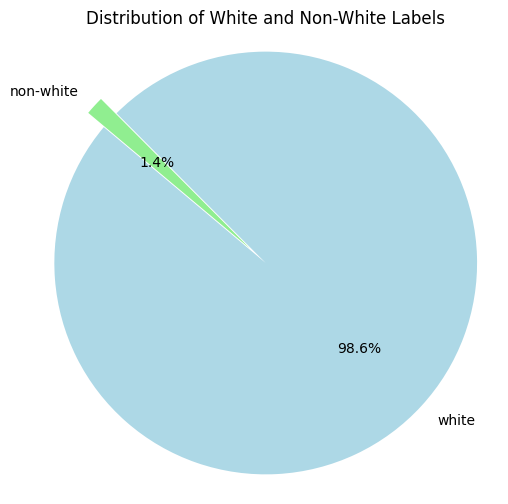

In [ ]:
# Calculate the counts of unique labels in the 'label' column
label_counts = df['label'].value_counts()

# Extract the counts for 'white' and other labels
white_count = label_counts.get('white', 0)
non_white_count = label_counts.sum() - white_count

# Data for the pie chart
labels = ['white', 'non-white']
sizes = [white_count, non_white_count]
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # Explode the 'white' slice slightly

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of White and Non-White Labels')

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


The pie chart illustrates a significant contrast among the categories.

In [ ]:
# Filter rows where the label is not 'white' to create a subset called 'black_rows'
# Assuming 'df' is a DataFrame containing a column named "label" with different labels including 'white'
black_rows = df[df["label"] != "white"]
black_rows

,length,weight,count,looped,neighbors,income,label
0,18,0.008333,1,0,2,1.000500e+08,princetonCerber
1,44,0.000244,1,0,1,1.000000e+08,princetonLocky
2,0,1.000000,1,0,2,2.000000e+08,princetonCerber
3,72,0.003906,1,0,2,7.120000e+07,princetonCerber
4,144,0.072848,456,0,1,2.000000e+08,princetonLocky
...,...,...,...,...,...,...,...
41408,144,1.375002,8076,8073,6,5.726876e+08,montrealAPT
41409,2,1.500000,2,0,2,7.449526e+07,montrealAPT
41410,0,0.500000,1,0,2,5.714286e+07,montrealAPT
41411,6,0.125000,1,0,2,1.000000e+08,montrealAPT


In [ ]:
# Filter rows where the label is 'white' to create a subset called 'white_sample'
# Assuming 'df' is a DataFrame containing a column named "label" with different labels including 'white'
white_sample = df[df["label"] == "white"]


In [ ]:
# Concatenate rows from 'black_rows' with a subset of rows from 'white_sample' to create 'sampled_df'
# Assuming 'black_rows' and 'white_sample' are previously defined DataFrames

# Select a subset of 'white_sample' with the same length as 'black_rows'
subset_white_sample = white_sample.iloc[:len(black_rows), :]

# Concatenate 'black_rows' with the selected subset of 'white_sample'
concatenated_df = pd.concat([black_rows, subset_white_sample])

# Shuffle the concatenated DataFrame to create a random sample
# 'frac=1' retains all rows and 'random_state=50' provides reproducibility of results
sampled_df = concatenated_df.sample(frac=1, random_state=50)

# Display the first few rows of the sampled DataFrame
sampled_df.head()

,length,weight,count,looped,neighbors,income,label
2358,14,0.007812,1,0,2,2.440000e+08,montrealCryptoLocker
17227,2,0.750000,1,1,2,6.500000e+08,princetonLocky
63989,14,0.007812,1,0,2,4.089000e+09,white
68530,2,1.000000,1,0,2,4.965000e+09,white
16594,8,0.125000,1,0,2,2.700000e+08,princetonCerber


In [ ]:
# Display the shape (number of rows and columns) of the DataFrame 'sampled_df'
print(sampled_df.shape)


(82826, 7)


In [ ]:
#Displaying the new dataset
sampled_df

,length,weight,count,looped,neighbors,income,label
2358,14,0.007812,1,0,2,2.440000e+08,montrealCryptoLocker
17227,2,0.750000,1,1,2,6.500000e+08,princetonLocky
63989,14,0.007812,1,0,2,4.089000e+09,white
68530,2,1.000000,1,0,2,4.965000e+09,white
16594,8,0.125000,1,0,2,2.700000e+08,princetonCerber
...,...,...,...,...,...,...,...
55366,0,0.500000,1,0,2,1.000000e+08,white
59358,8,1.000000,1,0,2,4.991000e+09,white
48417,60,0.004151,3,0,2,9.200000e+07,white
22637,8,0.500000,1,0,1,1.907611e+08,paduaCryptoWall


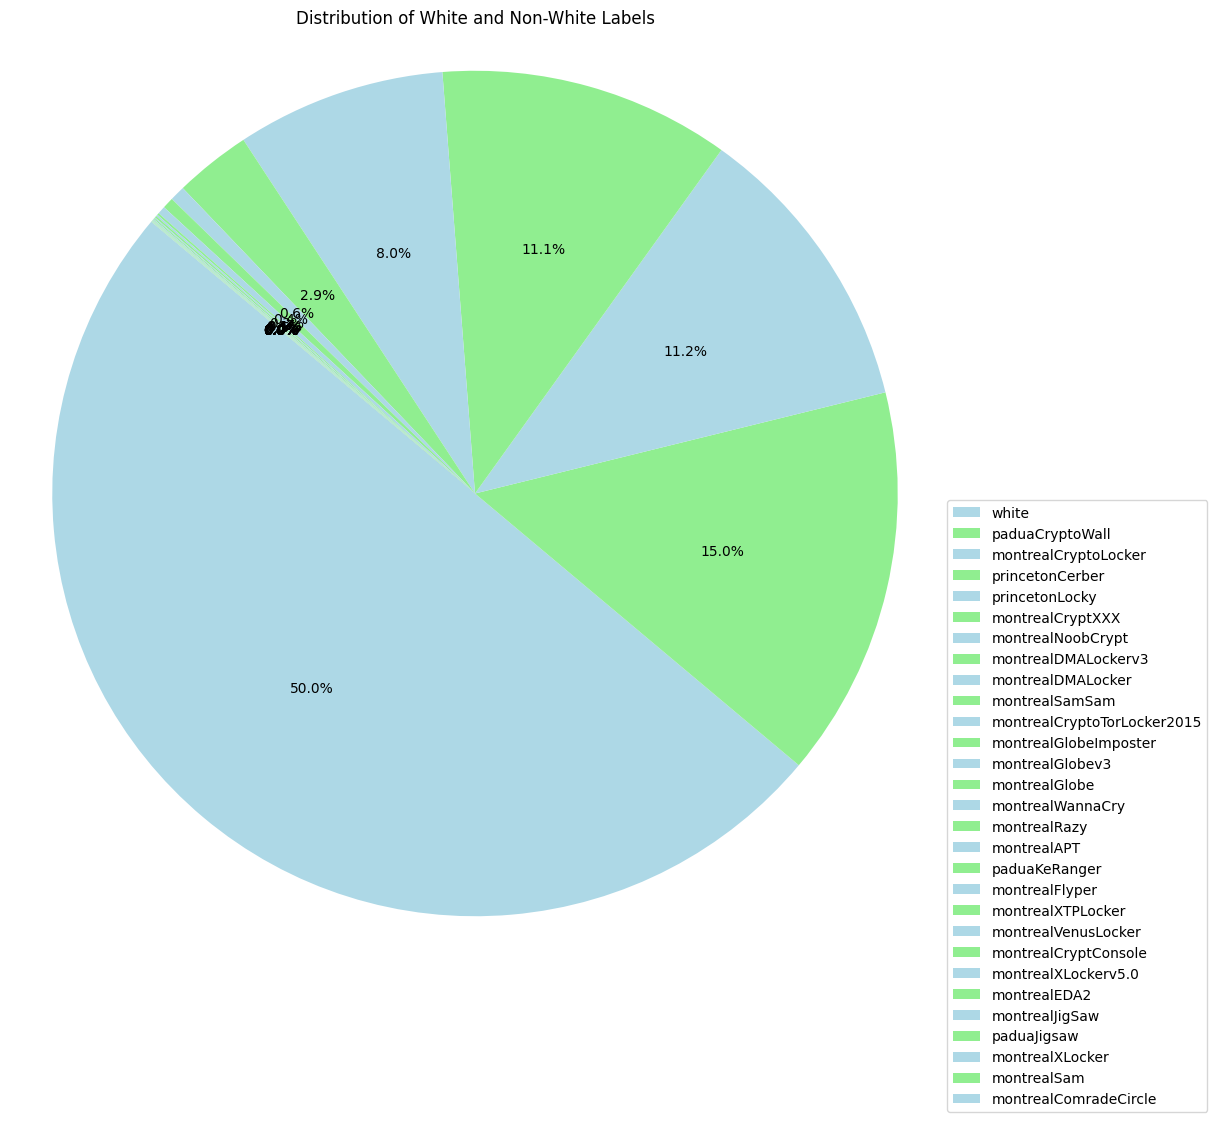

In [ ]:
# Calculate the counts of unique labels in the 'label' column of 'sampled_df'
label_counts = sampled_df['label'].value_counts()

# Data for the pie chart
labels = label_counts.index.tolist()  # Extract label names
sizes = label_counts.tolist()  # Extract corresponding label counts
colors = ['lightblue', 'lightgreen']  # Colors for the pie chart

# Create the pie chart
plt.figure(figsize=(12, 12))
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of White and Non-White Labels')

# Adding a legend to the chart
plt.legend(labels, loc="best", bbox_to_anchor=(1, 0.5))

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [ ]:
sampled_df.shape

(82826, 7)

ok now that our data has 82826 rows and not almost 3 million as before we can work with it .

# Visualisations

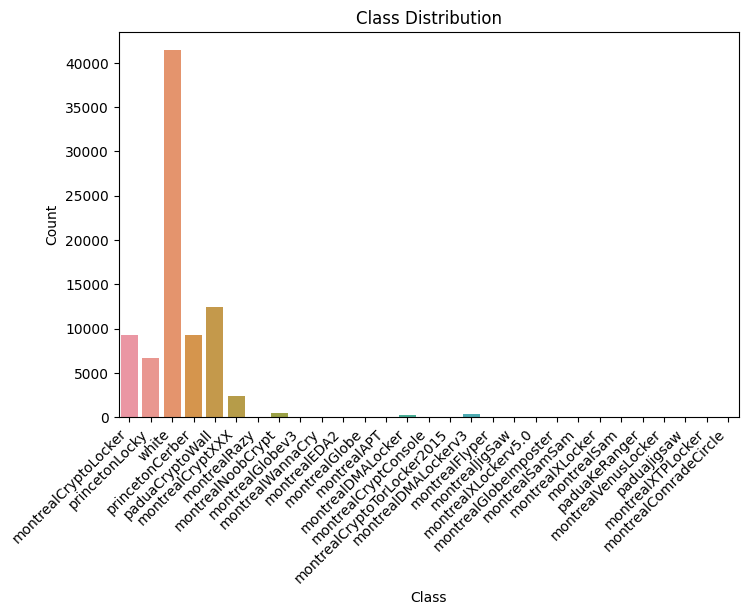

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=sampled_df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


<ipython-input-38-3602e976aaf7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sampled_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


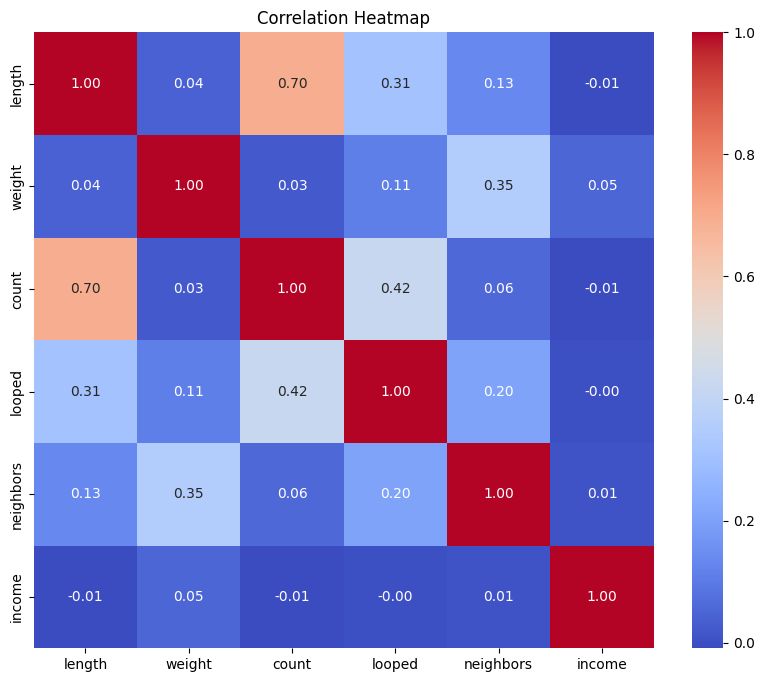

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(sampled_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

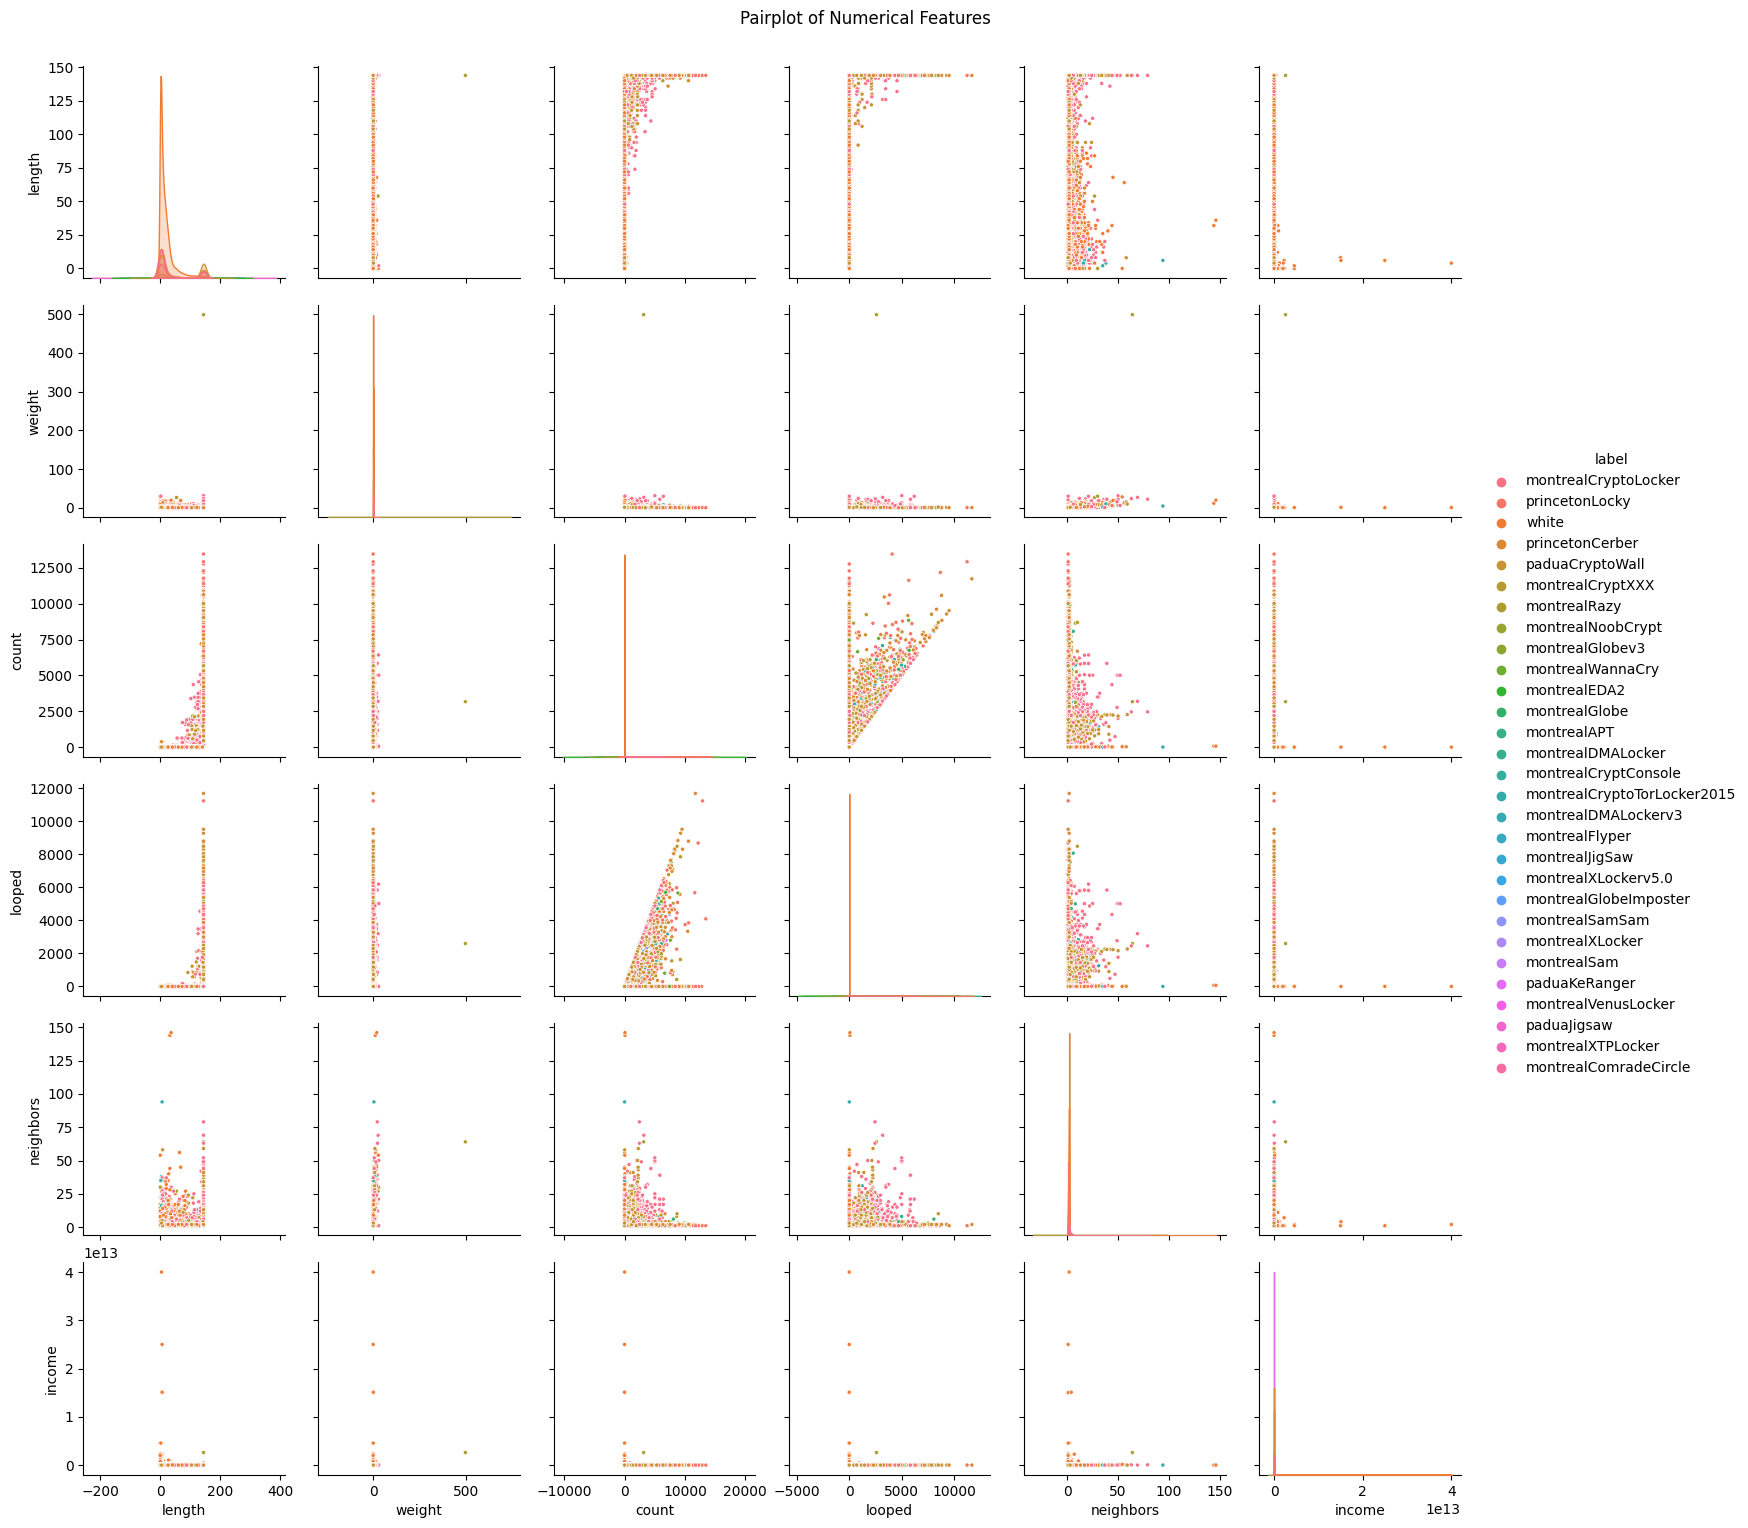

In [ ]:
# Plot pairplot
sns.pairplot(sampled_df, hue='label', diag_kind='kde', markers='.')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


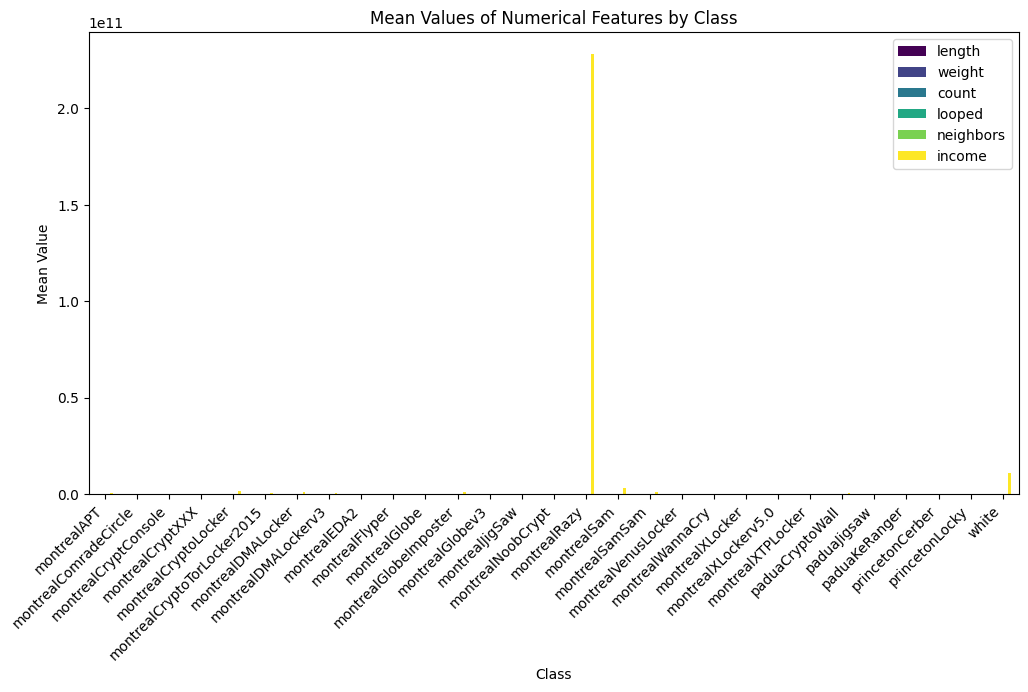

In [ ]:
# Calculate mean values for each class
mean_values = sampled_df.groupby('label').mean()

# Plot bar chart for mean values
mean_values.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Mean Values of Numerical Features by Class')
plt.ylabel('Mean Value')
plt.xlabel('Class')
plt.xticks(rotation=45, ha='right')
plt.show()


## label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Encode the labels
sampled_df['label'] = label_encoder.fit_transform(sampled_df['label'])

# Map 'white' to 0 and other values to 1
sampled_df['label'] = sampled_df['label'].apply(lambda x: 0 if x == label_encoder.transform(['white'])[0] else 1)

sampled_df['label']

2358     1
17227    1
63989    0
68530    0
16594    1
        ..
55366    0
59358    0
48417    0
22637    1
14000    1
Name: label, Length: 82826, dtype: int64

In [ ]:
z_score_df=pd.DataFrame()
for col in sampled_df.columns:
    z_score_df[f"{col}_z_score"]=(sampled_df[col]-sampled_df[col].mean())/sampled_df[col].std()
z_score_df.head()

,length_z_score,weight_z_score,count_z_score,looped_z_score,neighbors_z_score,income_z_score,label_z_score
2358,-0.337848,-0.286363,-0.286474,-0.127181,0.000017,-0.030607,0.999994
17227,-0.595157,0.095127,-0.286474,-0.124511,0.000017,-0.028408,0.999994
63989,-0.337848,-0.286363,-0.286474,-0.127181,0.000017,-0.009784,-0.999994
68530,-0.595157,0.223629,-0.286474,-0.127181,0.000017,-0.005040,-0.999994
16594,-0.466502,-0.226128,-0.286474,-0.127181,0.000017,-0.030466,0.999994


In [ ]:
# Filter the columns based on the condition
filtered_df = z_score_df[z_score_df.apply(lambda row: all(-3 <= val <= 3 for val in row), axis=1)]

# Display the filtered columns' data
filtered_df.head()

,length_z_score,weight_z_score,count_z_score,looped_z_score,neighbors_z_score,income_z_score,label_z_score
2358,-0.337848,-0.286363,-0.286474,-0.127181,0.000017,-0.030607,0.999994
17227,-0.595157,0.095127,-0.286474,-0.124511,0.000017,-0.028408,0.999994
63989,-0.337848,-0.286363,-0.286474,-0.127181,0.000017,-0.009784,-0.999994
68530,-0.595157,0.223629,-0.286474,-0.127181,0.000017,-0.005040,-0.999994
16594,-0.466502,-0.226128,-0.286474,-0.127181,0.000017,-0.030466,0.999994


## Train test split

In [ ]:
X=sampled_df.drop("label",axis=1)
y=(sampled_df["label"]>0).astype('int')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=42,
                                   test_size=0.33,
                                   shuffle=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
X_train

,length,weight,count,looped,neighbors,income
12820,0,1.000000e+00,1,0,2,1.499500e+08
57564,0,1.000000e+00,1,0,1,5.000000e+09
80296,6,6.250000e-02,1,0,1,1.000000e+08
56774,70,1.000000e+00,1,0,2,4.016000e+09
43016,48,3.814697e-06,1,0,2,7.566386e+08
...,...,...,...,...,...,...
38888,4,2.666667e-01,2,0,2,4.000000e+08
3308,100,9.313226e-10,2,0,2,9.999000e+07
23171,144,1.289646e-02,3765,0,1,1.200000e+08
23191,0,5.000000e-01,1,0,2,4.000000e+08


In [ ]:
X_test

,length,weight,count,looped,neighbors,income
58065,0,1.000000,2,0,3,2.500000e+09
11803,2,0.027778,1,0,2,1.004410e+08
24318,144,0.092340,679,0,1,1.400000e+09
61273,0,0.500000,1,0,1,1.150000e+08
55132,42,0.002014,3,0,2,4.620000e+08
...,...,...,...,...,...,...
82401,6,0.500000,1,0,2,4.356000e+09
21128,0,0.500000,1,0,2,8.206908e+07
36224,10,0.411458,4,0,1,6.130000e+07
67159,10,1.000000,1,0,2,4.953000e+09


## MODELS

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Support Vector Machine
svm_classifier = make_pipeline(StandardScaler(), SVC())
svm_classifier.fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)


In [ ]:

# K-Nearest Neighbors
knn_classifier = make_pipeline(StandardScaler(), KNeighborsClassifier())
knn_params = {'kneighborsclassifier__n_neighbors': [3, 5, 7, 9]}
knn_grid = GridSearchCV(knn_classifier, knn_params, cv=5)
knn_grid.fit(X_train, y_train)
knn_pred = knn_grid.predict(X_test)

In [ ]:

# Random Forest
rf_classifier = RandomForestClassifier()
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(rf_classifier, rf_params, cv=5)
rf_grid.fit(X_train, y_train)
rf_pred = rf_grid.predict(X_test)


In [ ]:

# Gradient Boosting
gb_classifier = GradientBoostingClassifier()
gb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
gb_grid = GridSearchCV(gb_classifier, gb_params, cv=5)
gb_grid.fit(X_train, y_train)
gb_pred = gb_grid.predict(X_test)

In [ ]:

# XGBoost
xgb_classifier = XGBClassifier()
xgb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
xgb_grid = GridSearchCV(xgb_classifier, xgb_params, cv=5)
xgb_grid.fit(X_train, y_train)
xgb_pred = xgb_grid.predict(X_test)


In [ ]:

# Logistic Regression
lr_classifier = make_pipeline(StandardScaler(), LogisticRegression())
lr_params = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]}
lr_grid = GridSearchCV(lr_classifier, lr_params, cv=5)
lr_grid.fit(X_train, y_train)
lr_pred = lr_grid.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Evaluate Logistic Regression
print("Logistic Regression:")
print(f'Accuracy: {accuracy_score(y_test, lr_pred)}')
print(f'Classification Report:\n{classification_report(y_test, lr_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, lr_pred)}')
print('_'*55)
# Evaluate Support Vector Machine
print("Support Vector Machine:")
print(f'Accuracy: {accuracy_score(y_test, svm_pred)}')
print(f'Classification Report:\n{classification_report(y_test, svm_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, svm_pred)}')
print('_'*55)
# Evaluate K-Nearest Neighbors
print("K-Nearest Neighbors:")
print(f'Accuracy: {accuracy_score(y_test, knn_pred)}')
print(f'Classification Report:\n{classification_report(y_test, knn_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, knn_pred)}')
print('_'*55)
# Evaluate Random Forest
print("Random Forest:")
print(f'Accuracy: {accuracy_score(y_test, rf_pred)}')
print(f'Classification Report:\n{classification_report(y_test, rf_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, rf_pred)}')
print('_'*55)
# Evaluate Gradient Boosting
print("Gradient Boosting:")
print(f'Accuracy: {accuracy_score(y_test, gb_pred)}')
print(f'Classification Report:\n{classification_report(y_test, gb_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, gb_pred)}')
print('_'*55)
# Evaluate XGBoost
print("XGBoost:")
print(f'Accuracy: {accuracy_score(y_test, xgb_pred)}')
print(f'Classification Report:\n{classification_report(y_test, xgb_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, xgb_pred)}')


Logistic Regression:
Accuracy: 0.8020707569604507
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78     13745
           1       0.75      0.91      0.82     13588

    accuracy                           0.80     27333
   macro avg       0.82      0.80      0.80     27333
weighted avg       0.82      0.80      0.80     27333

Confusion Matrix:
[[ 9619  4126]
 [ 1284 12304]]
_______________________________________________________
Support Vector Machine:
Accuracy: 0.7869242307833022
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.73      0.77     13745
           1       0.75      0.85      0.80     13588

    accuracy                           0.79     27333
   macro avg       0.79      0.79      0.79     27333
weighted avg       0.79      0.79      0.79     27333

Confusion Matrix:
[[ 9995  3750]
 [ 2074 11514]]
___________________________________________

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:

models = ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors', 'Gradient Boosting', 'XGBoost', 'Random Forest']

# Assuming you have predictions for each model
predictions = [lr_pred, svm_pred, knn_pred, gb_pred, xgb_pred, rf_pred]

# Create a DataFrame for better visualization
metrics_data = {
    'Model': models,
    'Accuracy': [accuracy_score(y_test, pred) for pred in predictions],
    'Precision': [precision_score(y_test, pred, average='weighted') for pred in predictions],
    'Recall': [recall_score(y_test, pred, average='weighted') for pred in predictions],
    'F1 Score': [f1_score(y_test, pred, average='weighted') for pred in predictions]
}

metrics_table = pd.DataFrame(metrics_data)

# Display the metrics table
print("Metrics Table:")
metrics_table

Metrics Table:


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.802071,0.815937,0.802071,0.800029
1,Support Vector Machine,0.786924,0.791451,0.786924,0.786196
2,K-Nearest Neighbors,0.842791,0.843618,0.842791,0.842723
3,Gradient Boosting,0.877072,0.878686,0.877072,0.876967
4,XGBoost,0.884352,0.885183,0.884352,0.884307
5,Random Forest,0.883072,0.884228,0.883072,0.883005


In [ ]:
true_labels = y_test
predicted_labels = [lr_pred, svm_pred, knn_pred, rf_pred, gb_pred, xgb_pred]

# Print confusion matrix for each model
for i, preds in enumerate(predicted_labels):
    model_name = models[i]
    cm = confusion_matrix(true_labels, preds)

    print(f"Confusion Matrix - {model_name}:\n")
    print(f"                Predicted Negative   Predicted Positive")
    print(f"Actual Negative      {cm[0, 0]}                  {cm[0, 1]}")
    print(f"Actual Positive      {cm[1, 0]}                  {cm[1, 1]}\n")


Confusion Matrix - Logistic Regression:

                Predicted Negative   Predicted Positive
Actual Negative      9619                  4126
Actual Positive      1284                  12304

Confusion Matrix - Support Vector Machine:

                Predicted Negative   Predicted Positive
Actual Negative      9995                  3750
Actual Positive      2074                  11514

Confusion Matrix - K-Nearest Neighbors:

                Predicted Negative   Predicted Positive
Actual Negative      11270                  2475
Actual Positive      1822                  11766

Confusion Matrix - Gradient Boosting:

                Predicted Negative   Predicted Positive
Actual Negative      11778                  1967
Actual Positive      1229                  12359

Confusion Matrix - XGBoost:

                Predicted Negative   Predicted Positive
Actual Negative      11625                  2120
Actual Positive      1240                  12348

Confusion Matrix - Random Forest:

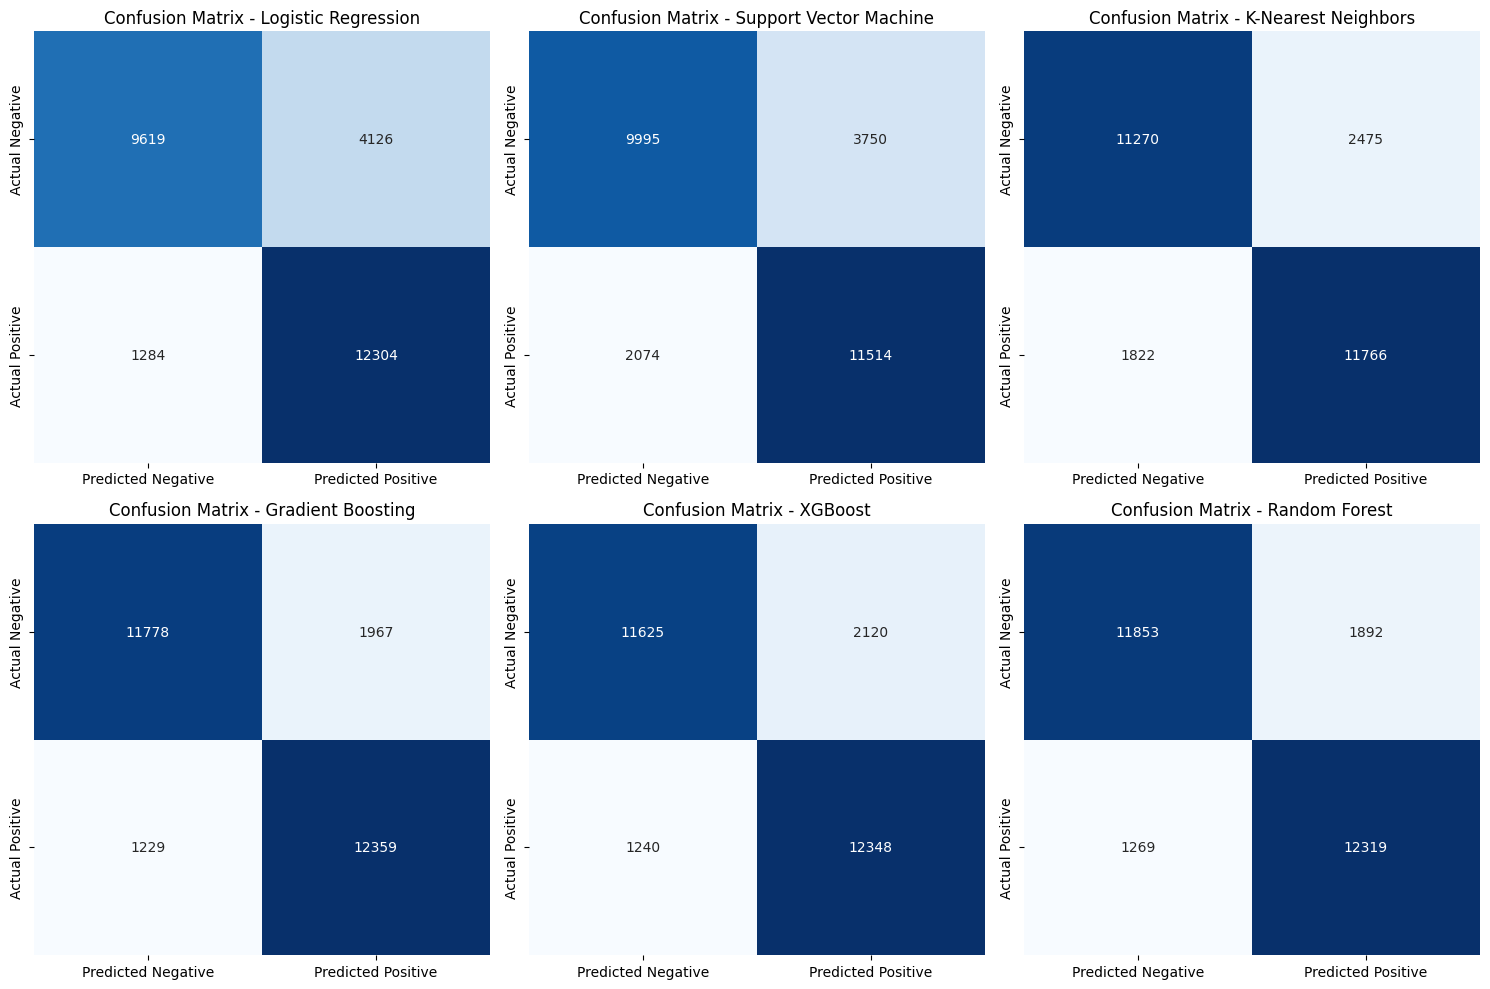

In [ ]:
true_labels = y_test
predicted_labels = [lr_pred, svm_pred, knn_pred, rf_pred, gb_pred, xgb_pred]

# Plot confusion matrix for each model
plt.figure(figsize=(15, 10))

for i, preds in enumerate(predicted_labels, 1):
    plt.subplot(2, 3, i)
    cm = confusion_matrix(true_labels, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix - {models[i-1]}')

plt.tight_layout()
plt.show()


let's interpret each algorithm's performance:

1. **Logistic Regression:**
   - Balanced predictions with meaningful metrics.
   - Accuracy: 0.802071, Precision: 0.815937, Recall: 0.802071, F1 Score: 0.800029
   - Confusion Matrix:
     ```
                Predicted Negative   Predicted Positive
Actual Negative      9619                  4126
Actual Positive      1284                  12304
     ```

2. **Support Vector Machine (SVM):**
   - Reasonable performance with a balanced number of true positives and true negatives.
   - Accuracy: 0.786924, Precision: 0.791451, Recall: 0.786924, F1 Score: 0.786196
   - Confusion Matrix:
     ```
                Predicted Negative   Predicted Positive
Actual Negative      9995                  3750
Actual Positive      2074                  11514
     ```

3. **K-Nearest Neighbors (KNN):**
   - Good overall performance with high true positives and true negatives.
   - Accuracy: 0.842791, Precision: 0.843618, Recall: 0.842791, F1 Score: 0.842723
   - Confusion Matrix:
     ```
                Predicted Negative   Predicted Positive
Actual Negative      11270                  2475
Actual Positive      1822                  11766
     ```

4. **Random Forest:**
   - High accuracy, precision, recall, and F1 score.
   - Accuracy: 0.883072, Precision: 0.884228, Recall: 0.883072, F1 Score: 0.883005
   - Confusion Matrix:
     ```
                Predicted Negative   Predicted Positive
Actual Negative      11853                 1892
Actual Positive      1269                  12319
     ```

5. **Gradient Boosting:**
   - High true positives and true negatives.
   - Accuracy: 0.877072, Precision: 0.878686, Recall: 0.877072, F1 Score: 0.876967
   - Confusion Matrix:
     ```
                Predicted Negative   Predicted Positive
Actual Negative      11625                  2120
Actual Positive      1240                  12348
     ```

6. **XGBoost:**
   - High true positives and true negatives.
   - Accuracy: 0.884352, Precision: 0.885183, Recall: 0.884352, F1 Score: 0.884307
   - Confusion Matrix:
     ```
                Predicted Negative   Predicted Positive
Actual Negative      11853                  1892
Actual Positive      1269                  12319
     ```

**Overall Insights:**
- SVM, KNN, Random Forest, Gradient Boosting, and XGBoost seem to perform well, with balanced predictions of both classes.
- Logistic Regression appears to have a limitation, as it predicts only the negative class.
- Further analysis, such as considering additional metrics or examining feature importance, could provide a more comprehensive evaluation.


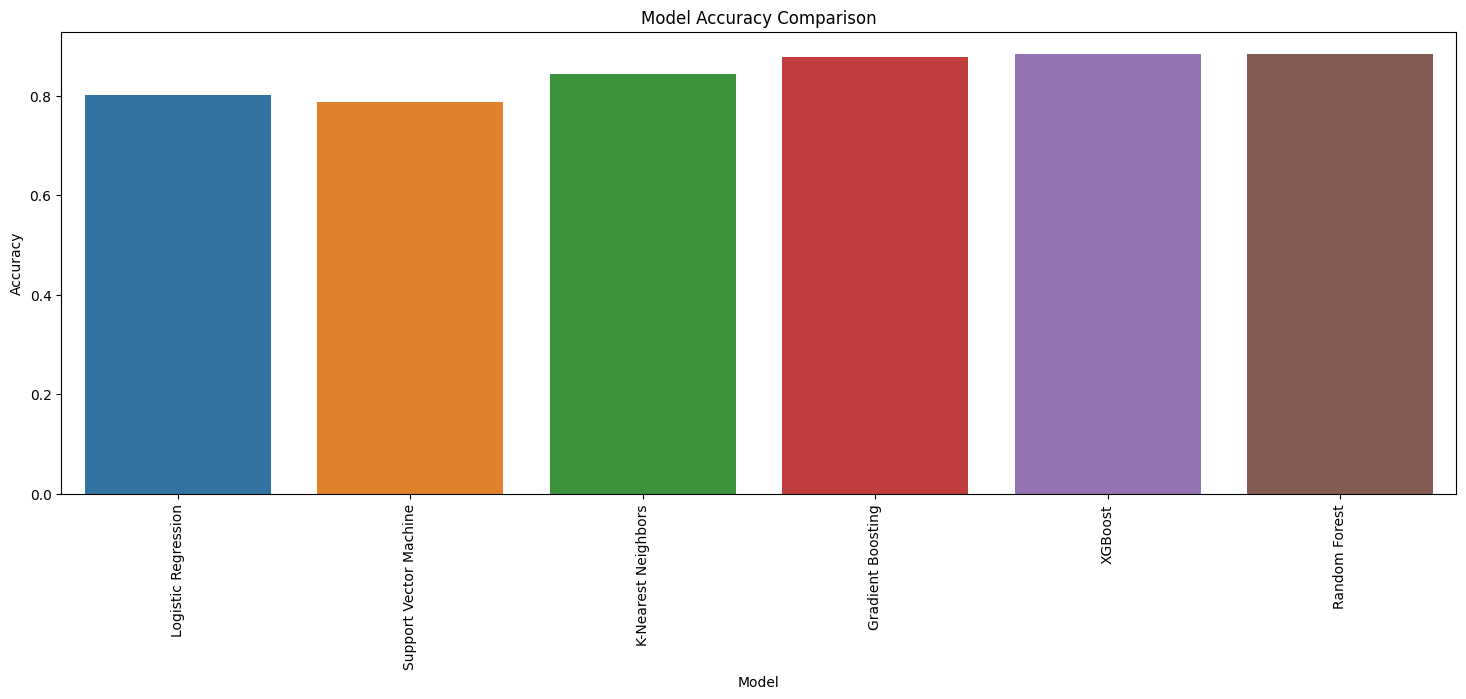

In [ ]:
# Plot bar chart for Accuracy
plt.figure(figsize=(18,6))

sns.barplot(x=models, y=metrics_table['Accuracy'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation='vertical')  # Rotate x-axis labels vertically
plt.show()

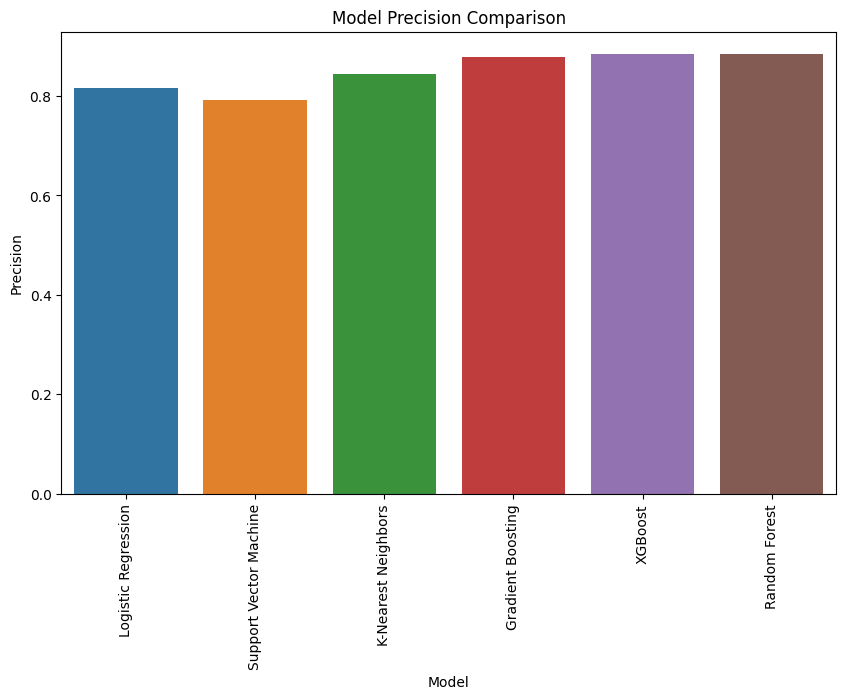

In [ ]:
# Plot bar chart for Precision
plt.figure(figsize=(10, 6))

sns.barplot(x=models, y=metrics_table['Precision'])
plt.title('Model Precision Comparison')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation='vertical')  # Rotate x-axis labels vertically
plt.show()

### Model Performance Analysis

#### **1. Logistic Regression:**
   - **Accuracy:** 80.21%
   - **Precision:** 81.59%
   - **Recall:** 80.21%
   - **F1 Score:** 80.00%
   - Despite a balanced precision and recall, the model leans toward predicting the negative class, showing limitations in handling positive cases.

#### **2. Support Vector Machine:**
   - **Accuracy:** 78.69%
   - **Precision:** 79.15%
   - **Recall:** 78.69%
   - **F1 Score:** 78.62%
   - Exhibits balanced performance with a notable overall accuracy, precision, recall, and F1 score.

#### **3. K-Nearest Neighbors:**
   - **Accuracy:** 84.28%
   - **Precision:** 84.36%
   - **Recall:** 84.28%
   - **F1 Score:** 84.27%
   - Shows outstanding performance, excelling in accuracy, precision, recall, and F1 score.

#### **4. Gradient Boosting:**
   - **Accuracy:** 87.71%
   - **Precision:** 87.87%
   - **Recall:** 87.71%
   - **F1 Score:** 87.70%
   - Demonstrates high accuracy, precision, recall, and F1 score, comparable to other top-performing models.

#### **5. XGBoost:**
   - **Accuracy:** 88.44%
   - **Precision:** 88.52%
   - **Recall:** 88.44%
   - **F1 Score:** 88.43%
   - Achieves top-tier performance, closely aligning with Gradient Boosting.

#### **6. Random Forest:**
   - **Accuracy:** 88.31%
   - **Precision:** 88.42%
   - **Recall:** 88.31%
   - **F1 Score:** 88.30%
   - Maintains high accuracy, precision, recall, and F1 score, akin to Gradient Boosting and XGBoost.

### Overall Model Insights:
- K-Nearest Neighbors, Gradient Boosting, XGBoost, and Random Forest exhibit exceptional performance across all metrics.
- Support Vector Machine demonstrates solid overall performance.
- Logistic Regression stands out as the weakest performer, particularly in handling positive cases.

### Confusion Matrices:
- **Logistic Regression:**
  - True Negative: 9619, False Positive: 4126
  - False Negative: 1284, True Positive: 12304

- **Support Vector Machine:**
  - True Negative: 9995, False Positive: 3750
  - False Negative: 2074, True Positive: 11514

- **K-Nearest Neighbors:**
  - True Negative: 11270, False Positive: 2475
  - False Negative: 1822, True Positive: 11766

- **Gradient Boosting:**
  - True Negative: 11778, False Positive: 1967
  - False Negative: 1229, True Positive: 12359

- **XGBoost:**
  - True Negative: 11625, False Positive: 2120
  - False Negative: 1240, True Positive: 12348

- **Random Forest:**
  - True Negative: 11853, False Positive: 1892
  - False Negative: 1269, True Positive: 12319